2023-12-18 09:35:09.484 | INFO     | FinMind.data.finmind_api:get_data:123 - download TaiwanStockHoldingSharesPer, data_id: 0050


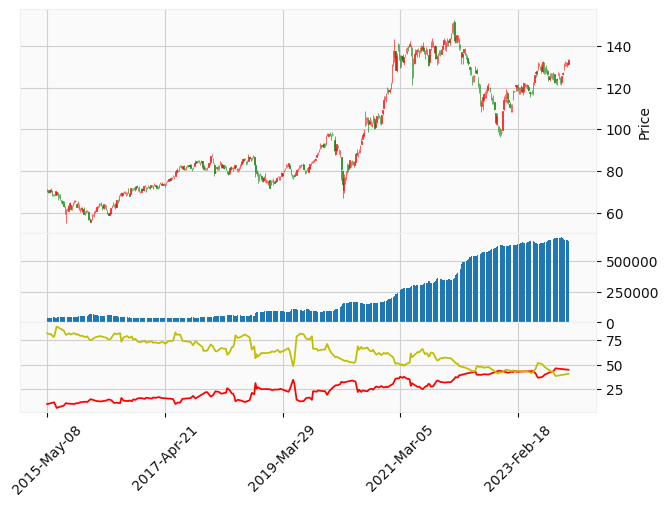

In [1]:
# 載入必要套件
from Data import getPriceAndShareHolder
from BackTest import ChartTrade
import mplfinance as mpf

# 取得回測資料
prod = "0050"
data = getPriceAndShareHolder(prod, "2013-01-01", "2023-12-15")

# 30張持有以下稱為散戶
data["minority"] = data["1"] + data["2"] + data["3"] + data["4"] + data["5"]
# 400張持有以上稱為大股東
data["major"] = data["12"] + data["13"] + data["14"] + data["15"]

# 繪製副圖
addp = []
# 總股東人數圖
addp.append(
    mpf.make_addplot(data["total_people"], panel=1, type="bar", secondary_y=False)
)
# 小股東曲線
addp.append(mpf.make_addplot(data["minority"], panel=2, secondary_y=False, color="r"))
# 大股東曲線
addp.append(mpf.make_addplot(data["major"], panel=2, secondary_y=False, color="y"))

# 繪製K線圖與交易明細
ChartTrade(data, addp=addp, v_enable=False)
